<a href="https://colab.research.google.com/github/AngelKociankowski/MIA/blob/MIA1/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: ---Angel Sebastian Kociankowski Montelongo--------------------------------------
*   MATRÍCULA: ---------A01379225---------------------------

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/Actividad9_RLog"
os.chdir(DIR)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [47]:

print("Información del DataFrame:")
print(data_df.info())

print("\nResumen estadístico de las columnas numéricas:")
print(data_df.describe())

print("\nValores nulos por columna:")
print(data_df.isnull().sum())

print("\nDistribución de la variable objetivo (diagnosis):")
print(data_df['diagnosis'].value_counts())


print("\nVista previa del DataFrame con 'id' como índice:")
print(data_df.head())

data_df.set_index('id', inplace=True)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14 



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [50]:
print("Estadísticas descriptivas para variables numéricas:")
print(data_df.describe())

print("\n Estadísticas descriptivas para variables categóricas:")
print(data_df.describe(include=['object']))

Estadísticas descriptivas para variables numéricas:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.0193

1b) Valores únicos por variable para identificar posibles variables

categóricas.

In [51]:
valores_unicos = data_df.nunique()
print(valores_unicos)


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


1c) Búsqueda de valores faltantes.

In [52]:
valores_faltantes = data_df.isnull().sum()
print(valores_faltantes)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

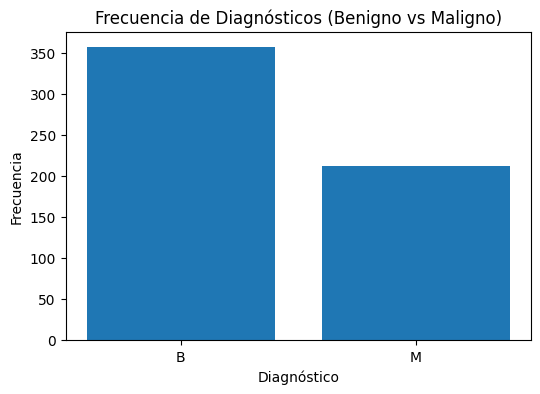

In [54]:

diagnosis_counts = data_df['diagnosis'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Diagnósticos (Benigno vs Maligno)")
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

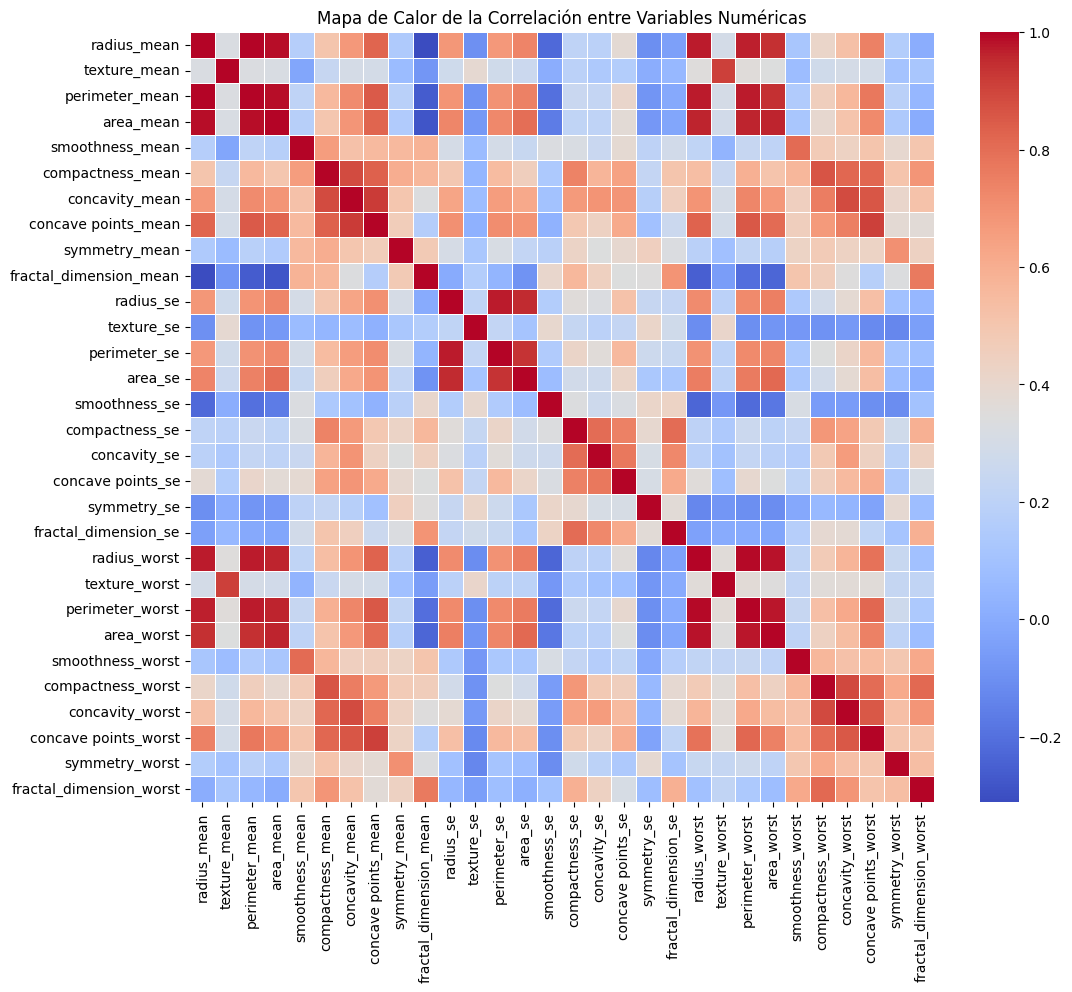

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

data_numeric = data_df.select_dtypes(include=['number'])

plt.figure(figsize=(12,10))
sns.heatmap(data_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Calor de la Correlación entre Variables Numéricas")
plt.show()


Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

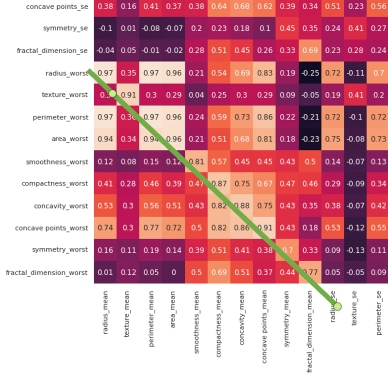

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [61]:
data_df = data_df.drop(columns=[col for col in data_df.columns if '_worst' in col])


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




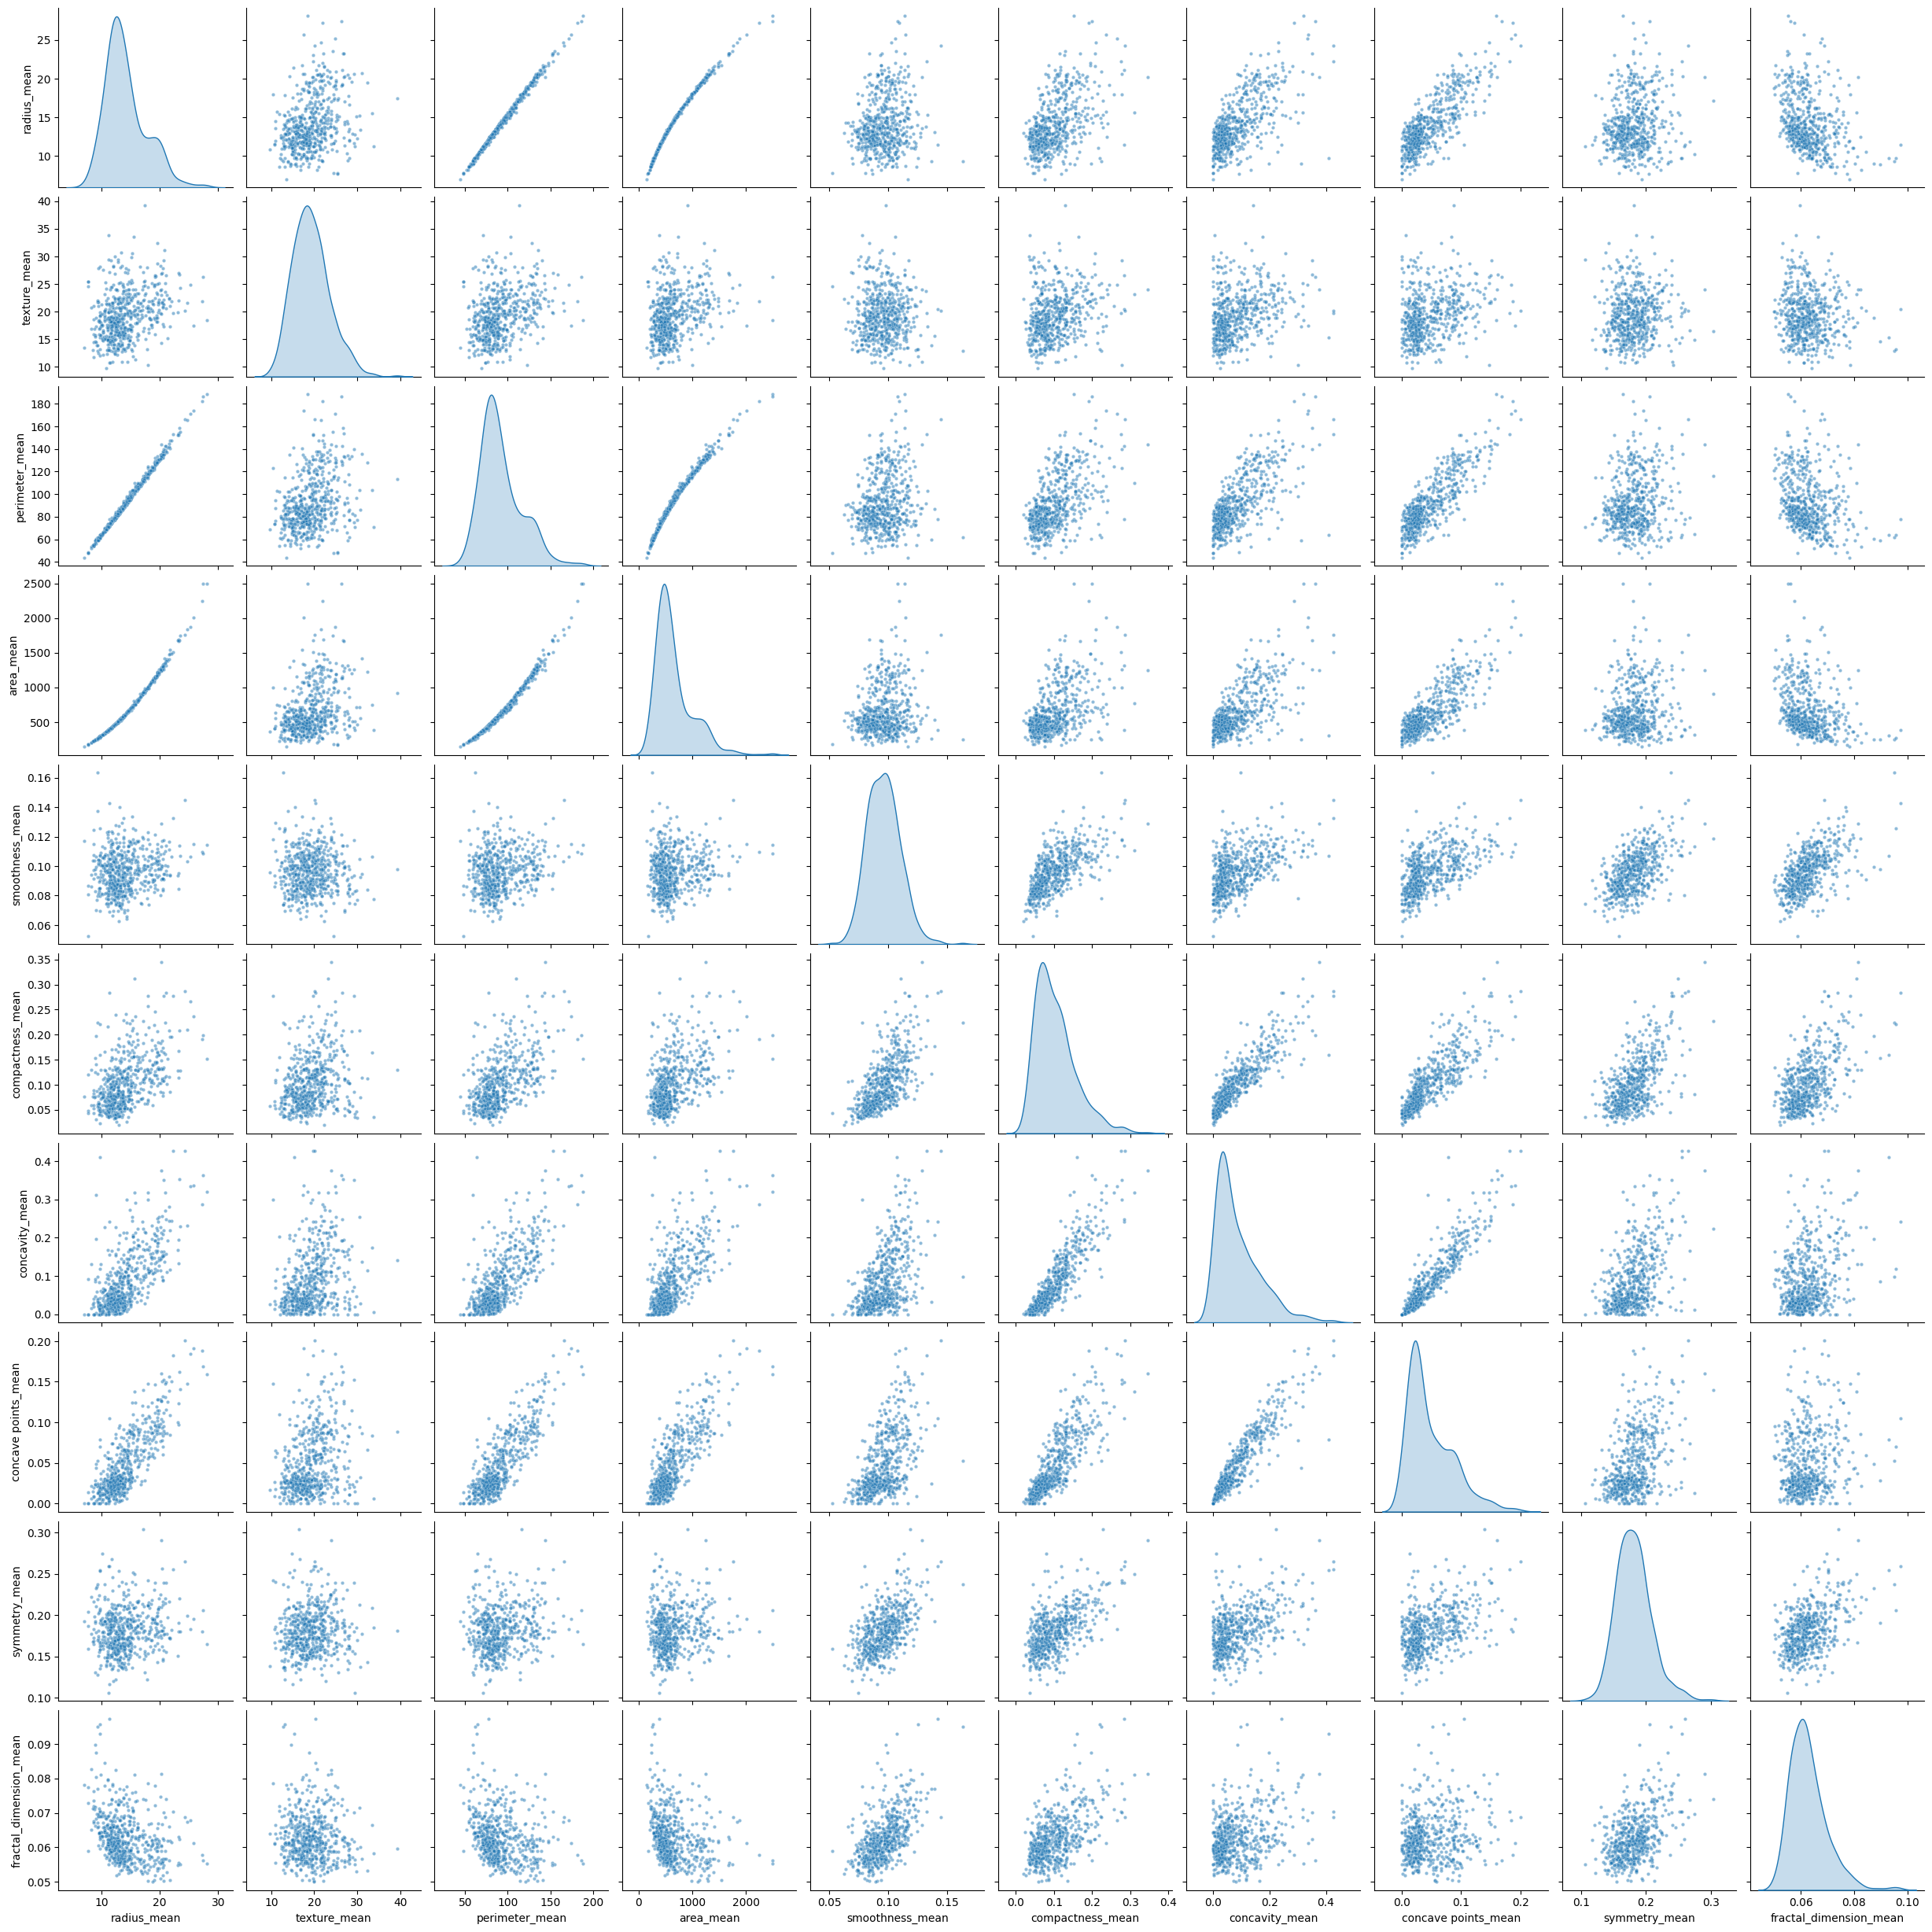

In [62]:
selected_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

sns.pairplot(data=data_df[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


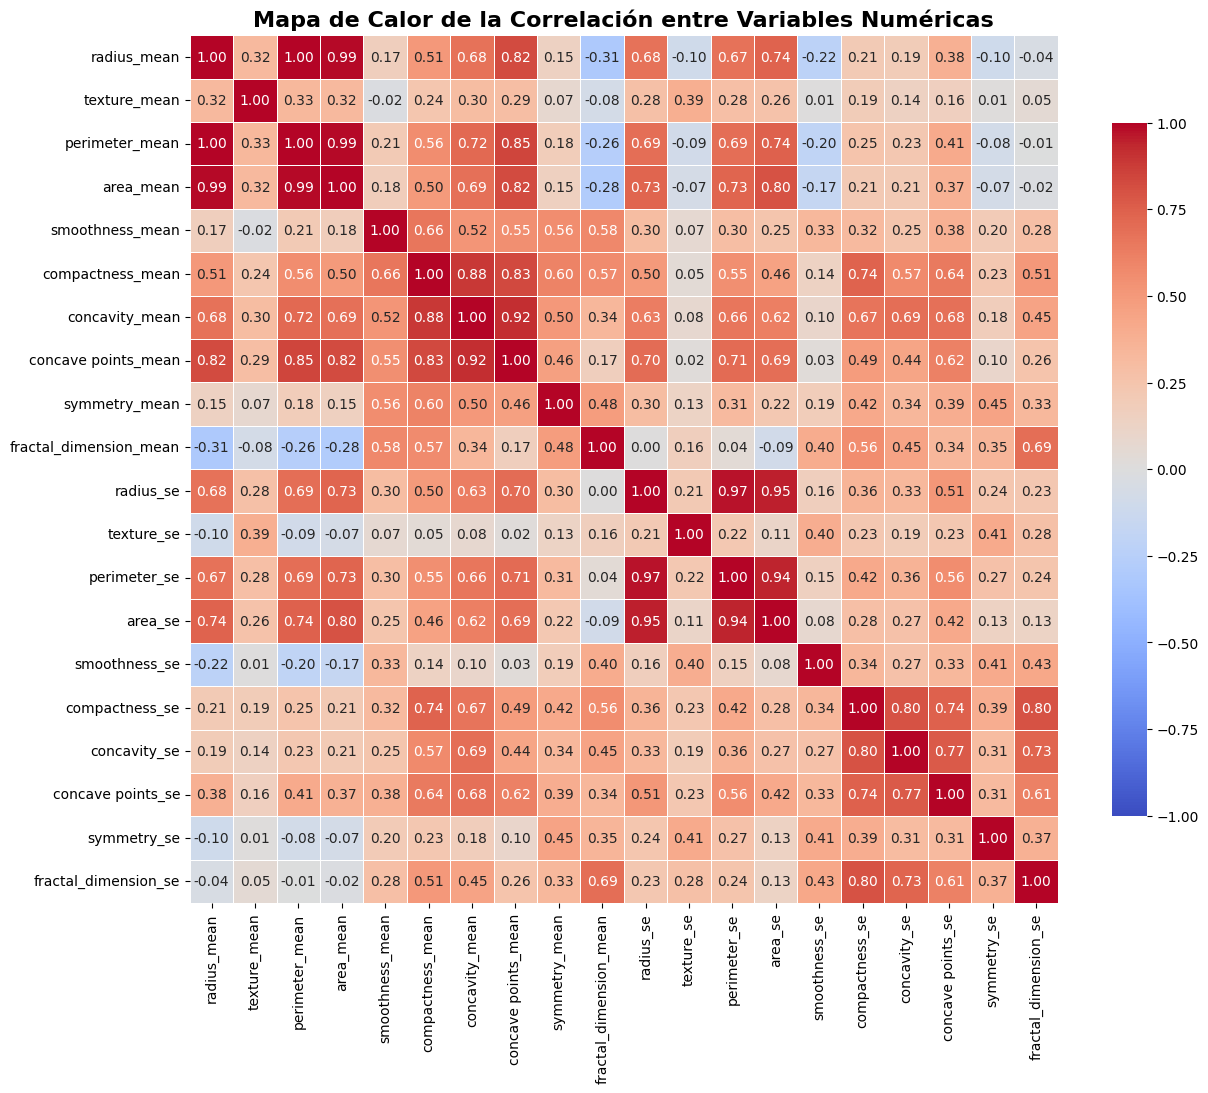

In [64]:
data_numeric = data_df.select_dtypes(include=['number'])
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f",
            cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1, square=True)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Calor de la Correlación entre Variables Numéricas", fontsize=16, fontweight='bold')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [65]:
columns_to_remove = [col for col in data_df.columns if any(sub in col for sub in ['perimeter', 'area', 'smoothness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension'])]
data_df = data_df.drop(columns=columns_to_remove)


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

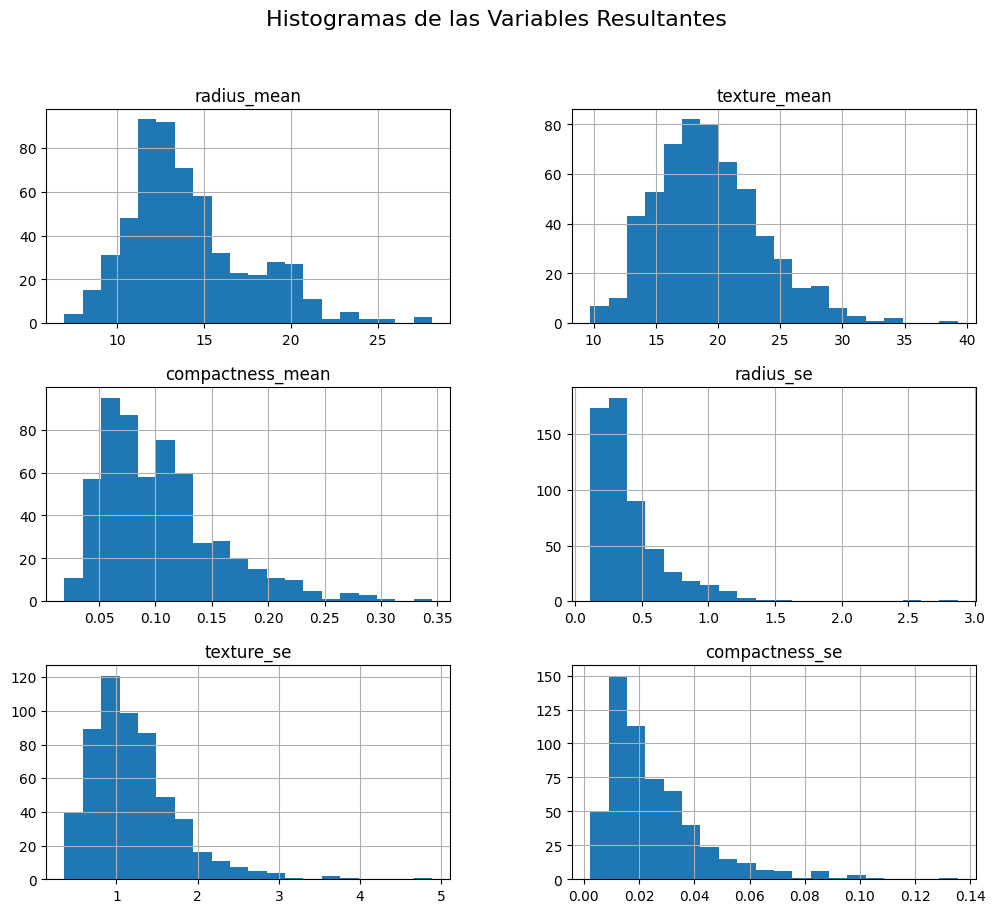

In [66]:
data_numeric = data_df.select_dtypes(include=['number'])

data_numeric.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogramas de las Variables Resultantes", fontsize=16)
plt.show()

skew_cols = data_numeric.columns[data_numeric.skew() > 1].tolist()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


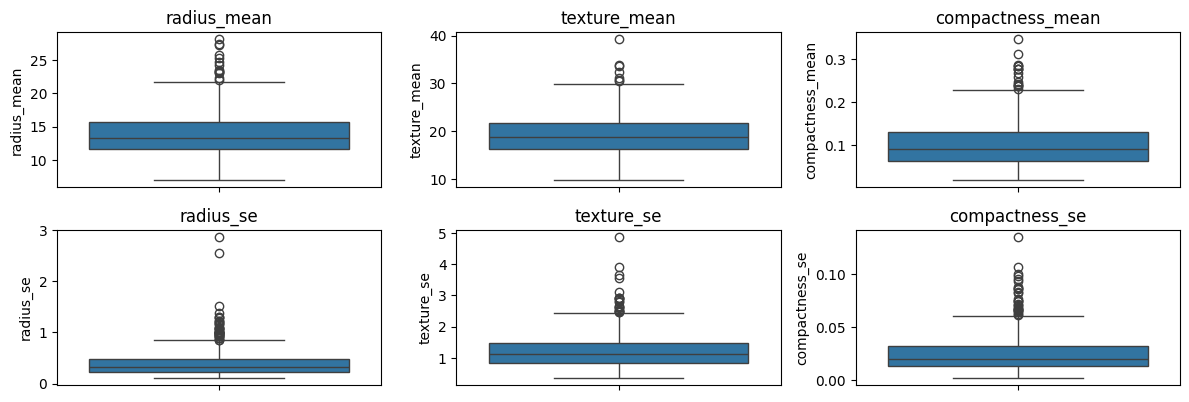

In [67]:
plt.figure(figsize=(12, 8))
data_numeric = data_df.select_dtypes(include=['number'])

for i, col in enumerate(data_numeric.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data_numeric[col])
    plt.title(col)

plt.tight_layout()
plt.show()

scale_cols = [col for col in data_numeric.columns if data_numeric[col].min() < 0 or data_numeric[col].max() > 1]

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [70]:
from sklearn.model_selection import train_test_split

X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [71]:
from sklearn.compose import ColumnTransformer

columns_to_remove = [
    'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'texture_mean',
    'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'texture_se',
    'perimeter_worst', 'area_worst'
]

preprocessing = ColumnTransformer(
    transformers=[('drop_cols', 'drop', columns_to_remove)],
    remainder='passthrough'
)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [73]:

print(X_train.columns)


columns_to_remove = [col for col in X_train.columns if any(sub in col for sub in [
    'perimeter', 'area', 'smoothness', 'concavity', 'concave points',
    'symmetry', 'fractal_dimension', 'texture'
])]


preprocessing = ColumnTransformer(
    transformers=[('drop_cols', 'drop', columns_to_remove)],
    remainder='passthrough'
)


logr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression(random_state=1, max_iter=1000))
])

logr_model.fit(X_train, y_train)


y_pred = logr_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Matriz de Confusión:")
print(conf_matrix)


Index(['radius_mean', 'texture_mean', 'compactness_mean', 'radius_se',
       'texture_se', 'compactness_se'],
      dtype='object')
Accuracy: 0.8860
Precision: 0.9394
Recall: 0.7381
Matriz de Confusión:
[[70  2]
 [11 31]]


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [74]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline


sqrt_transformer = FunctionTransformer(func=np.sqrt, validate=True)


scaler = MinMaxScaler()

preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', columns_to_remove),
        ('sqrt_transform', sqrt_transformer, skew_cols),
        ('scale_transform', scaler, scale_cols)
    ],
    remainder='passthrough'
)


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [76]:
logr_model2 = Pipeline([
    ('preprocessing', preprocessing2),
    ('logistic_regression', LogisticRegression(random_state=1, max_iter=1000))
])

logr_model2.fit(X_train, y_train)

y_pred2 = logr_model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label='M')
recall2 = recall_score(y_test, y_pred2, pos_label='M')
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print("Matriz de Confusión:")
print(conf_matrix2)


Accuracy: 0.9035
Precision: 1.0000
Recall: 0.7381
Matriz de Confusión:
[[72  0]
 [11 31]]


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [78]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(explained_variance_ratio >= 0.99) + 1


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [80]:
from sklearn.pipeline import Pipeline

logr_model3 = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=num_components)),
    ('logistic_regression', LogisticRegression(random_state=1, max_iter=1000))
])

logr_model3.fit(X_train, y_train)


y_pred3 = logr_model3.predict(X_test)


accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label='M')
recall3 = recall_score(y_test, y_pred3, pos_label='M')
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])

print(f"Accuracy: {accuracy3:.4f}")
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print("Matriz de Confusión:")
print(conf_matrix3)


Accuracy: 0.9035
Precision: 0.8974
Recall: 0.8333
Matriz de Confusión:
[[68  4]
 [ 7 35]]


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

En un modelo de diagnóstico médico, la métrica más importante suele ser el
 del recall (sensibilidad), especialmente cuando el objetivo es detectar una enfermedad grave como el cancer. Recall mide la capacidad del modelo para identificar correctamente los casos positivos (M, maligno). En este contexto, un falso negativo (clasificar un tumor maligno como benigno) puede tener consecuencias graves.

Para priorizar el recall, disminuiría el threshold de clasificación. Al reducir el umbral, el modelo será más propenso a clasificar casos como malignos, lo que puede aumentar los falsos positivos (diagnosticar erróneamente un tumor benigno como maligno), pero reducirá los falsos negativos, asegurando que la mayoría de los casos malignos sean detectados.

Este enfoque es preferible en medicina, ya que un falso positivo puede llevar a pruebas adicionales (lo cual es un inconveniente, pero no peligroso), mientras que un falso negativo podría resultar en la omisión de un tratamiento crucial.